In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('ai_job_market.csv')
df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [7]:
print("Information of our dataset:")
print(df.info())
print("\nCalculation of our data set:")
print(df.describe())
print("\nNumbers of columns,Number of rows:")
print(df.shape)

Information of our dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB
None

Calculation of our data set:
            job_id
count  2000.000000
mean   1000.500000
std     577.494589
min       1.000000
25%     500.750000
50%    1000.500000


In [8]:
print("Data type of column:")
display(df.dtypes)
print("\nNull value in each feature:")
display(df.isnull().sum())

Data type of column:


job_id               int64
company_name        object
industry            object
job_title           object
skills_required     object
experience_level    object
employment_type     object
location            object
salary_range_usd    object
posted_date         object
company_size        object
tools_preferred     object
dtype: object


Null value in each feature:


job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64

In [9]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['job_id']
Categorical Columns: ['company_name', 'industry', 'job_title', 'skills_required', 'experience_level', 'employment_type', 'location', 'salary_range_usd', 'posted_date', 'company_size', 'tools_preferred']


In [10]:
if numeric_cols:
    print("\n Numeric Summary")
    display(df[numeric_cols].describe())
if categorical_cols:
    print("\n Categorical Summary")
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        display(df[col].value_counts().head(5))


 Numeric Summary


,job_id
count,2000.000000
mean,1000.500000
std,577.494589
min,1.000000
25%,500.750000
50%,1000.500000
75%,1500.250000
max,2000.000000



 Categorical Summary

Column: company_name


company_name
Johnson LLC     4
Williams LLC    3
Sanchez Ltd     3
Anderson PLC    3
Williams Ltd    3
Name: count, dtype: int64


Column: industry


industry
Automotive    300
Education     294
Retail        293
E-commerce    291
Finance       279
Name: count, dtype: int64


Column: job_title


job_title
Data Analyst          271
NLP Engineer          265
AI Product Manager    258
Quant Researcher      251
ML Engineer           250
Name: count, dtype: int64


Column: skills_required


skills_required
PyTorch, AWS, SQL                   2
Power BI, CUDA, Scikit-learn        2
R, Hugging Face, Flask              2
Azure, Power BI, GCP, LangChain     2
FastAPI, Scikit-learn, LangChain    2
Name: count, dtype: int64


Column: experience_level


experience_level
Entry     702
Mid       668
Senior    630
Name: count, dtype: int64


Column: employment_type


employment_type
Internship    574
Full-time     509
Contract      465
Remote        452
Name: count, dtype: int64


Column: location


location
North Melissashire, LA      1
Tylerland, GA               1
South Craigchester, KG      1
East Michelleborough, ZA    1
Kevinborough, SE            1
Name: count, dtype: int64


Column: salary_range_usd


salary_range_usd
126658-206526    1
97924-129750     1
83082-168419     1
62419-81701      1
72541-113000     1
Name: count, dtype: int64


Column: posted_date


posted_date
2023-10-03    10
2024-01-14     8
2025-06-12     8
2024-05-08     8
2025-03-16     8
Name: count, dtype: int64


Column: company_size


company_size
Startup    672
Mid        671
Large      657
Name: count, dtype: int64


Column: tools_preferred


tools_preferred
KDB+          96
TensorFlow    93
LangChain     90
BigQuery      83
MLflow        82
Name: count, dtype: int64

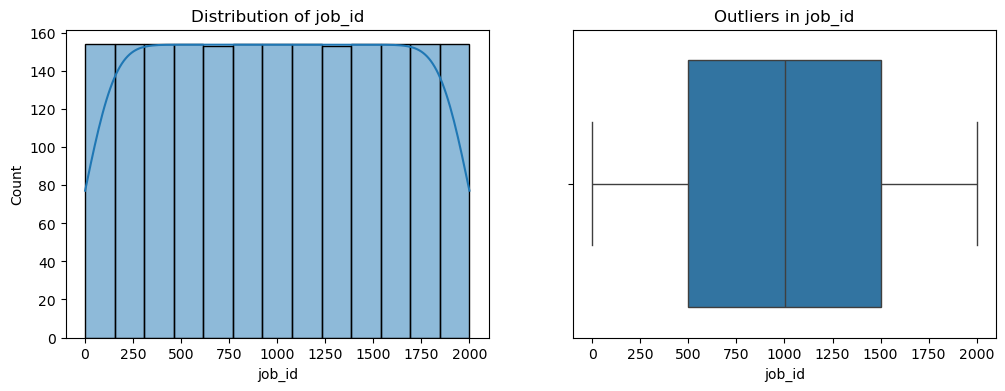

In [11]:
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))


    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribution of {col}')
    
    
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Outliers in {col}')
    
    plt.show()

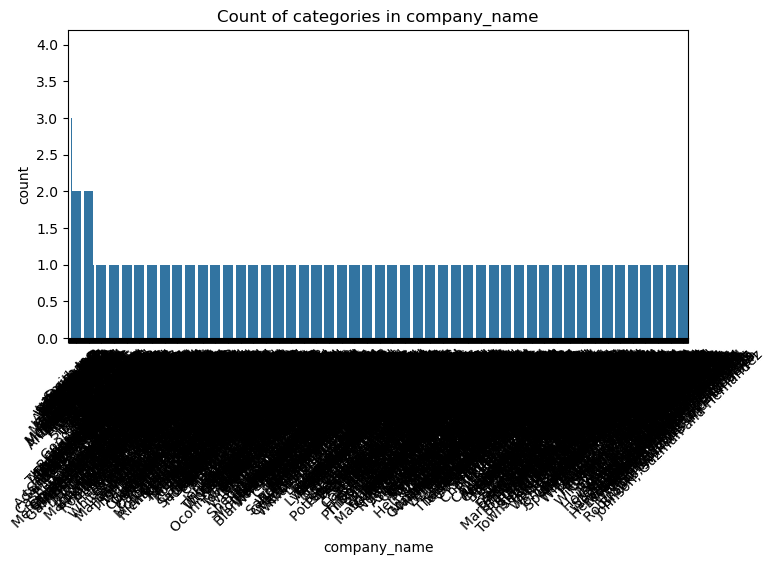

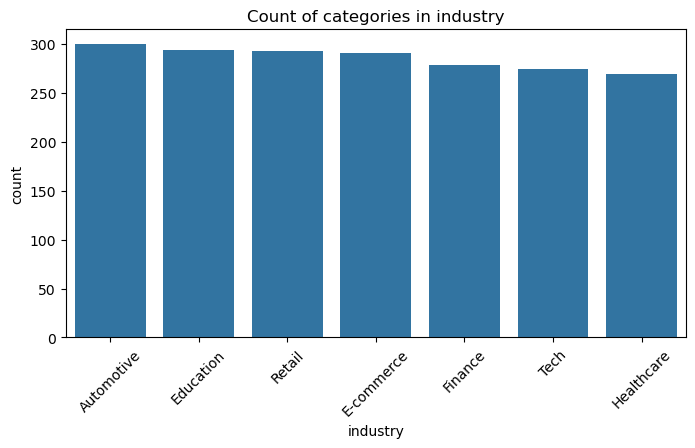

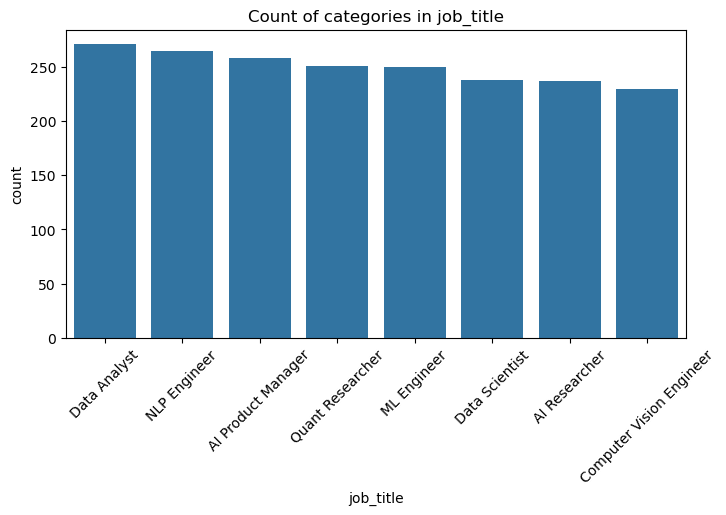

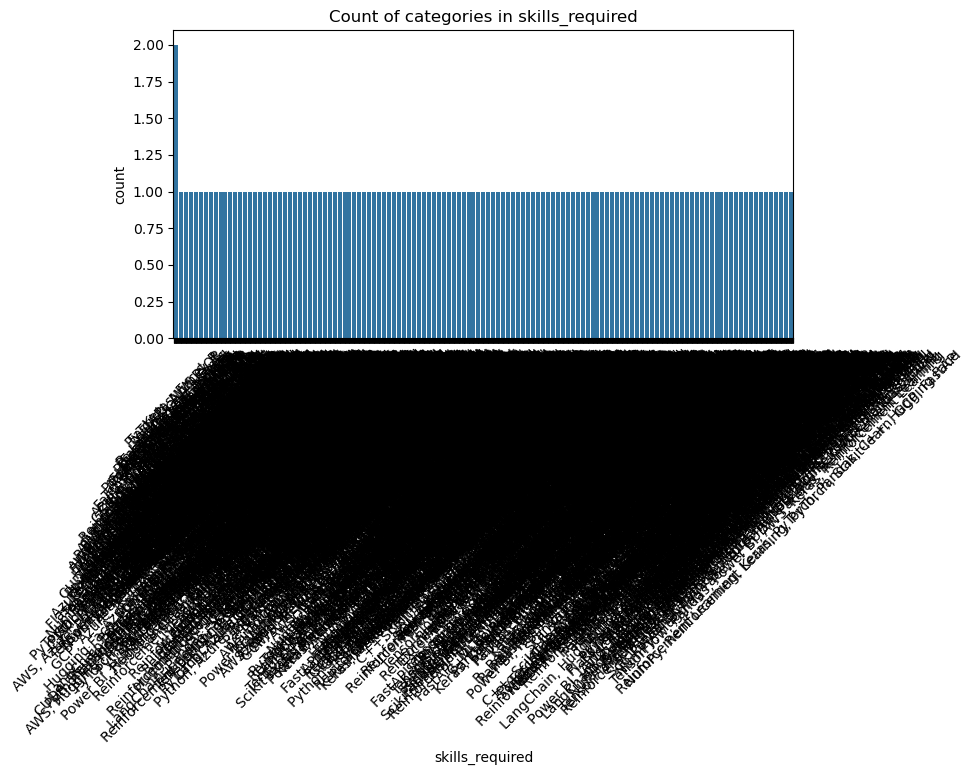

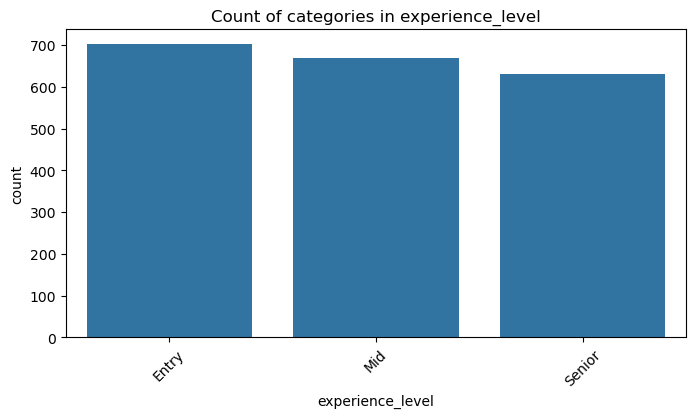

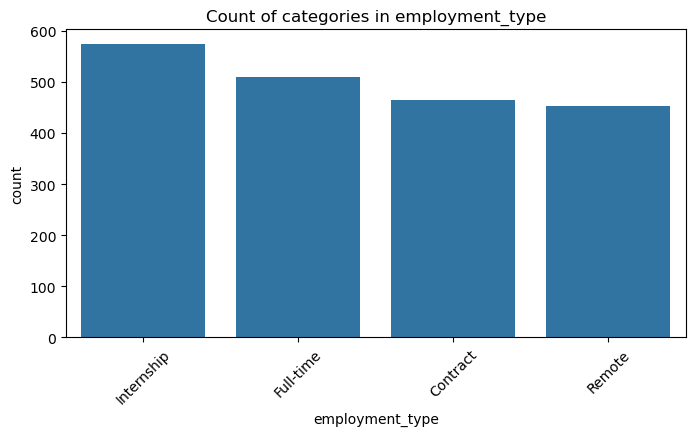

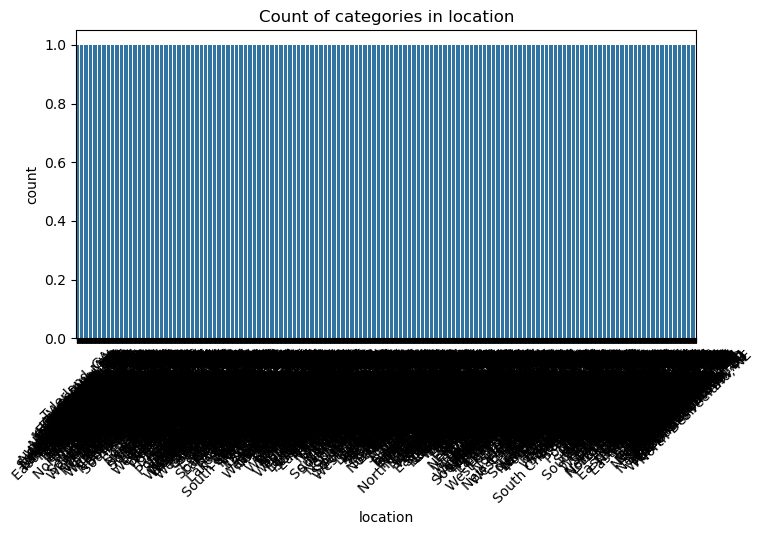

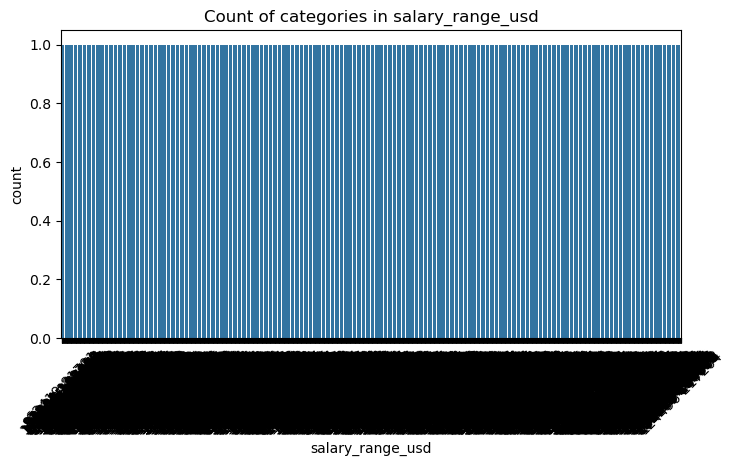

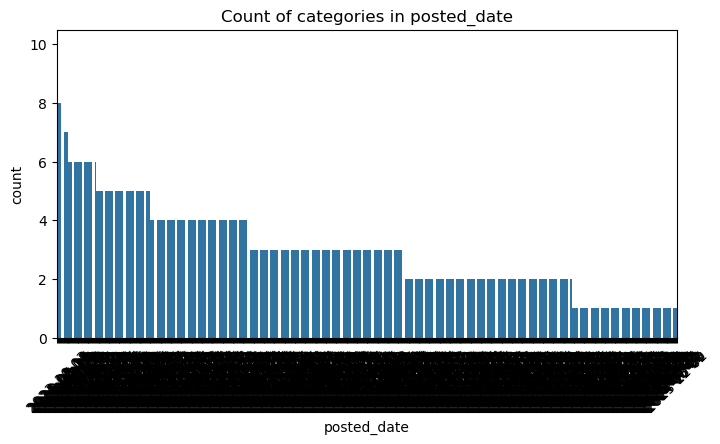

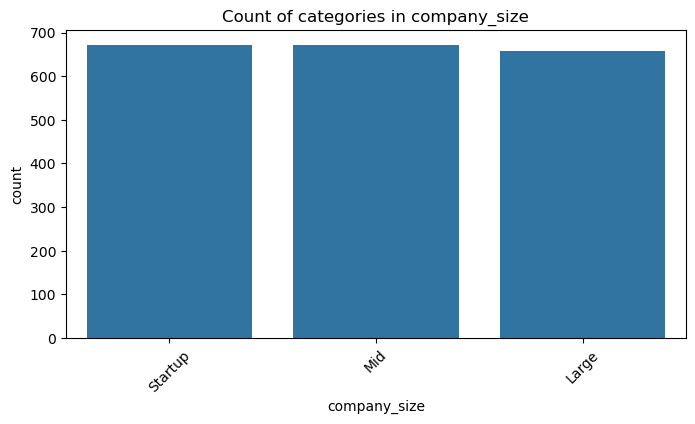

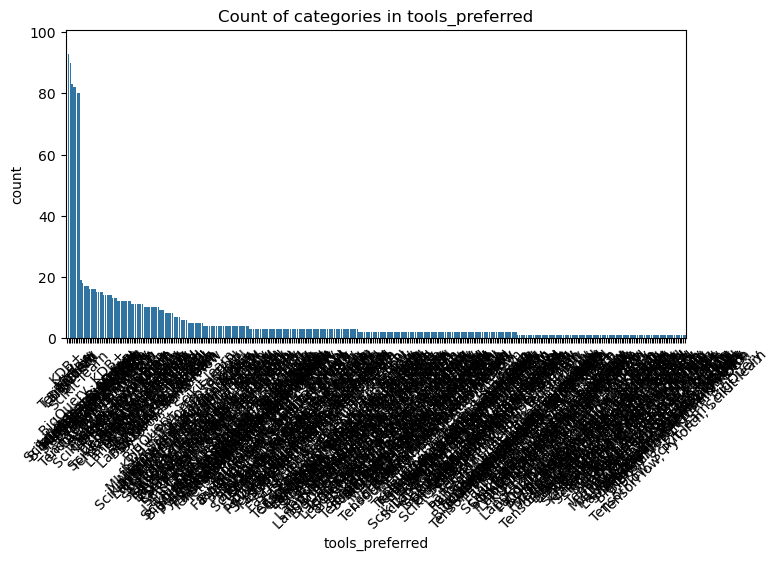

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
for col in numeric_cols:
    corr=df[numeric_cols].corr()[col]
    corr=corr.sort_values(ascending=False)
    top_corr=corr[abs(corr)>0.5]
    print(top_corr.drop(col))

Series([], Name: job_id, dtype: float64)


In [14]:
for col in numeric_cols:
        if df[col].is_monotonic_increasing:
            print(f"{col} shows an increasing trend over the dataset.")
        elif df[col].is_monotonic_decreasing:
            print(f"{col} shows a decreasing trend over the dataset.")

job_id shows an increasing trend over the dataset.


In [15]:
 for col in categorical_cols:
        top = df[col].value_counts().head(3)
        print(f"\nColumn: {col}, Top Categories:")
        for category, count in top.items():
            print(f"  {category}: {count} occurrences")


Column: company_name, Top Categories:
  Johnson LLC: 4 occurrences
  Williams LLC: 3 occurrences
  Sanchez Ltd: 3 occurrences

Column: industry, Top Categories:
  Automotive: 300 occurrences
  Education: 294 occurrences
  Retail: 293 occurrences

Column: job_title, Top Categories:
  Data Analyst: 271 occurrences
  NLP Engineer: 265 occurrences
  AI Product Manager: 258 occurrences

Column: skills_required, Top Categories:
  PyTorch, AWS, SQL: 2 occurrences
  Power BI, CUDA, Scikit-learn: 2 occurrences
  R, Hugging Face, Flask: 2 occurrences

Column: experience_level, Top Categories:
  Entry: 702 occurrences
  Mid: 668 occurrences
  Senior: 630 occurrences

Column: employment_type, Top Categories:
  Internship: 574 occurrences
  Full-time: 509 occurrences
  Contract: 465 occurrences

Column: location, Top Categories:
  North Melissashire, LA: 1 occurrences
  Tylerland, GA: 1 occurrences
  South Craigchester, KG: 1 occurrences

Column: salary_range_usd, Top Categories:
  126658-206526: 

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(numeric_cols) > 0:
    target_col = numeric_cols[-1]  
elif len(categorical_cols) > 0:
    target_col = categorical_cols[-1] 
else:
    print("No suitable target column found.")

In [22]:
X = df.drop(columns=[target_col])
y = df[target_col]
X = pd.get_dummies(X, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pprint

if y.dtype in ['int64', 'float64']:
    problem_type = "regression"
else:
    problem_type = "classification"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = {}

if problem_type == "regression":
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(random_state=42)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2": r2}

elif problem_type == "classification":
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = {"Accuracy": acc}

print("\n🔹 Model Performance:")
pprint.pprint(results)



🔹 Model Performance:
{'LinearRegression': {'MSE': 379962.7598946268, 'R2': -0.08988514763516764},
 'RandomForestRegressor': {'MSE': 374236.6047045, 'R2': -0.07346024458281586}}


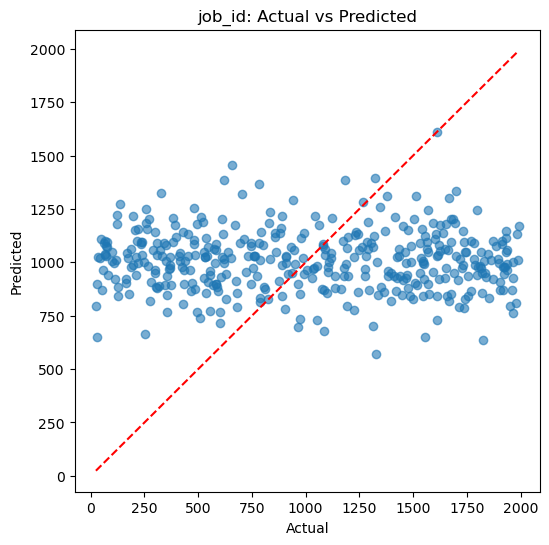

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

if problem_type == "regression":
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{target_col}: Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()
    
elif problem_type == "classification":
    sns.countplot(x=y_pred)
    plt.title(f"{target_col} Predicted Class Distribution")
    plt.show()
